# **Breast Cancer Regression Analysis**

In [24]:
#import datasets and load data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Load dataset
df = pd.read_csv('Breast_Cancer.csv')

In [25]:
# Handle missing values
# Impute numeric columns with the median and categorical columns with the mode
df.fillna(df.select_dtypes(include=[np.number]).median(), inplace=True)
for col in df.select_dtypes(include=[object]).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-25-1072680931.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [26]:
# Label encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=[object]).columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Define features (X) and target (y)
X = df.drop(columns=['Survival Months', 'Status'])  # Drop target and non-features
y = df['Survival Months']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0)
}

In [28]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))

    return mse, rmse, r2, cv_score

In [29]:
# Evaluate each model
for name, model in models.items():
    mse, rmse, r2, cv_score = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
    print(f"{name} Evaluation:")
    print(f"R2: {r2:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"Cross-validation (MSE): {cv_score:.3f}\n")

# Choose the best model based on R2
best_model = max(models.items(), key=lambda x: evaluate_model(x[1], X_train_scaled, y_train, X_test_scaled, y_test)[2])
print(f"The best model is: {best_model[0]}")

Linear Regression Evaluation:
R2: 0.060
RMSE: 22.419
Cross-validation (MSE): -514.489

Ridge Regression Evaluation:
R2: 0.060
RMSE: 22.419
Cross-validation (MSE): -514.480

The best model is: Ridge Regression


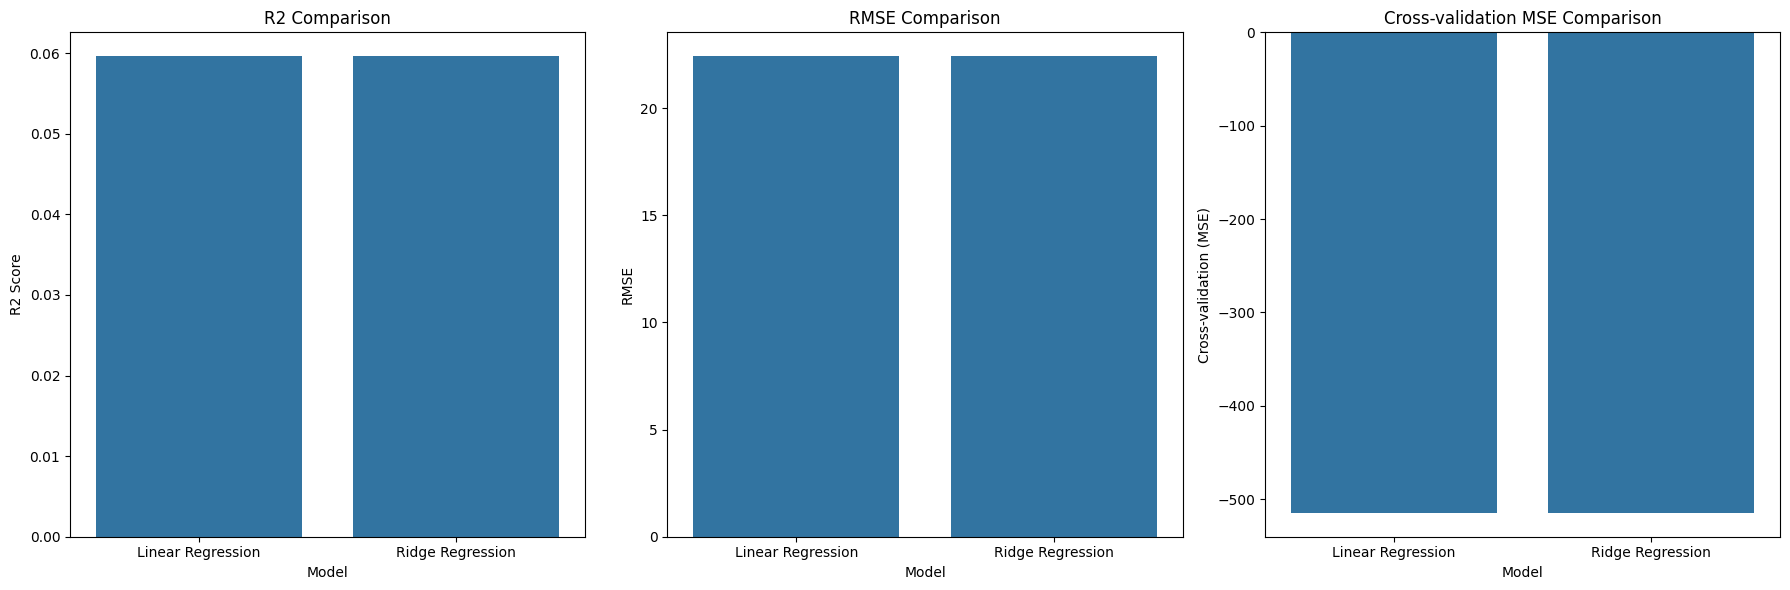

The best model is: Ridge Regression


In [30]:
# Convert results to DataFrame for visualization
evaluation_df = pd.DataFrame(evaluation_results)

# Visualization 1: Comparison of R2, RMSE, and Cross-validation MSE
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# R2 Bar Plot
sns.barplot(x='Model', y='R2', data=evaluation_df, ax=axes[0])
axes[0].set_title('R2 Comparison')
axes[0].set_ylabel('R2 Score')

# RMSE Bar Plot
sns.barplot(x='Model', y='RMSE', data=evaluation_df, ax=axes[1])
axes[1].set_title('RMSE Comparison')
axes[1].set_ylabel('RMSE')

# Cross-validation MSE Bar Plot
sns.barplot(x='Model', y='Cross-validation (MSE)', data=evaluation_df, ax=axes[2])
axes[2].set_title('Cross-validation MSE Comparison')
axes[2].set_ylabel('Cross-validation (MSE)')

plt.tight_layout()
plt.show()

# Choose the best model based on R2
best_model = max(models.items(), key=lambda x: evaluate_model(x[1], X_train_scaled, y_train, X_test_scaled, y_test)[2])
print(f"The best model is: {best_model[0]}")
